In [47]:
cd C:\Users\SRILATHA K\Desktop\fake_job_postings.csv

C:\Users\SRILATHA K\Desktop\fake_job_postings.csv


In [48]:
#loading dataset
import pandas as pd
data=pd.read_csv('fake_job_postings.csv')

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [50]:
data.drop(['job_id','description','has_company_logo','location','salary_range','benefits','function'],inplace=True,axis=1)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   department           6333 non-null   object
 2   company_profile      14572 non-null  object
 3   requirements         15185 non-null  object
 4   telecommuting        17880 non-null  int64 
 5   has_questions        17880 non-null  int64 
 6   employment_type      14409 non-null  object
 7   required_experience  10830 non-null  object
 8   required_education   9775 non-null   object
 9   industry             12977 non-null  object
 10  fraudulent           17880 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 1.5+ MB


In [52]:
data.drop(['department','required_experience','required_education'],inplace=True,axis=1)

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            17880 non-null  object
 1   company_profile  14572 non-null  object
 2   requirements     15185 non-null  object
 3   telecommuting    17880 non-null  int64 
 4   has_questions    17880 non-null  int64 
 5   employment_type  14409 non-null  object
 6   industry         12977 non-null  object
 7   fraudulent       17880 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 1.1+ MB


In [54]:
data['company_profile'].fillna('others', inplace=True)

In [55]:
data['requirements'].fillna('others', inplace=True)

In [56]:
data['employment_type'].fillna('others', inplace=True)

In [57]:
data['industry'].fillna('others', inplace=True)

In [58]:
import pandas as pd
pd.crosstab(index=[data.employment_type],columns=[data.fraudulent],margins=True)

fraudulent,0,1,All
employment_type,,,
Contract,1480,44,1524
Full-time,11130,490,11620
Other,212,15,227
Part-time,723,74,797
Temporary,239,2,241
others,3230,241,3471
All,17014,866,17880


C:\Users\SRILATHA K\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SRILATHA K\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


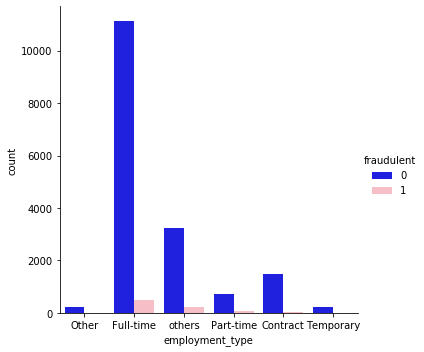

In [59]:
sb.factorplot(x='employment_type',data=data,hue='fraudulent',palette=['#0000ff','#FFB6C1'],kind='count',size=5,aspect=1)

In [60]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['title','company_profile','requirements','employment_type','industry']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   title            17880 non-null  int32
 1   company_profile  17880 non-null  int32
 2   requirements     17880 non-null  int32
 3   telecommuting    17880 non-null  int64
 4   has_questions    17880 non-null  int64
 5   employment_type  17880 non-null  int32
 6   industry         17880 non-null  int32
 7   fraudulent       17880 non-null  int64
dtypes: int32(5), int64(3)
memory usage: 768.4 KB


In [62]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [63]:
from sklearn.model_selection import train_test_split as tts 
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=53)

In [64]:
from sklearn.linear_model import LogisticRegression as logreg
model_logreg=logreg() #object creation for the model
model_logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
y_pred=model_logreg.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [66]:
acc=model_logreg.score(x_test,y_test)
print('Logistic Regression Accuracy:',acc)

Logistic Regression Accuracy: 0.9442580164056674


C:\Users\SRILATHA K\anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\SRILATHA K\anaconda3\lib\site-packages\seaborn\categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


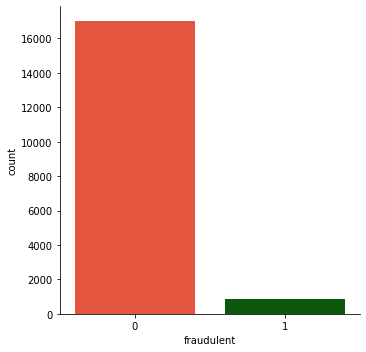

In [67]:
import seaborn as sb
sb.factorplot(x='fraudulent',data=data,kind='count',palette=['#ff4125','#006400'],size=5,aspect=1)